In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv

train = pd.read_csv('data/train&val/train.csv')
test = pd.read_csv('data/test/test.csv')
train.head()
mean_columns = ['X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean']

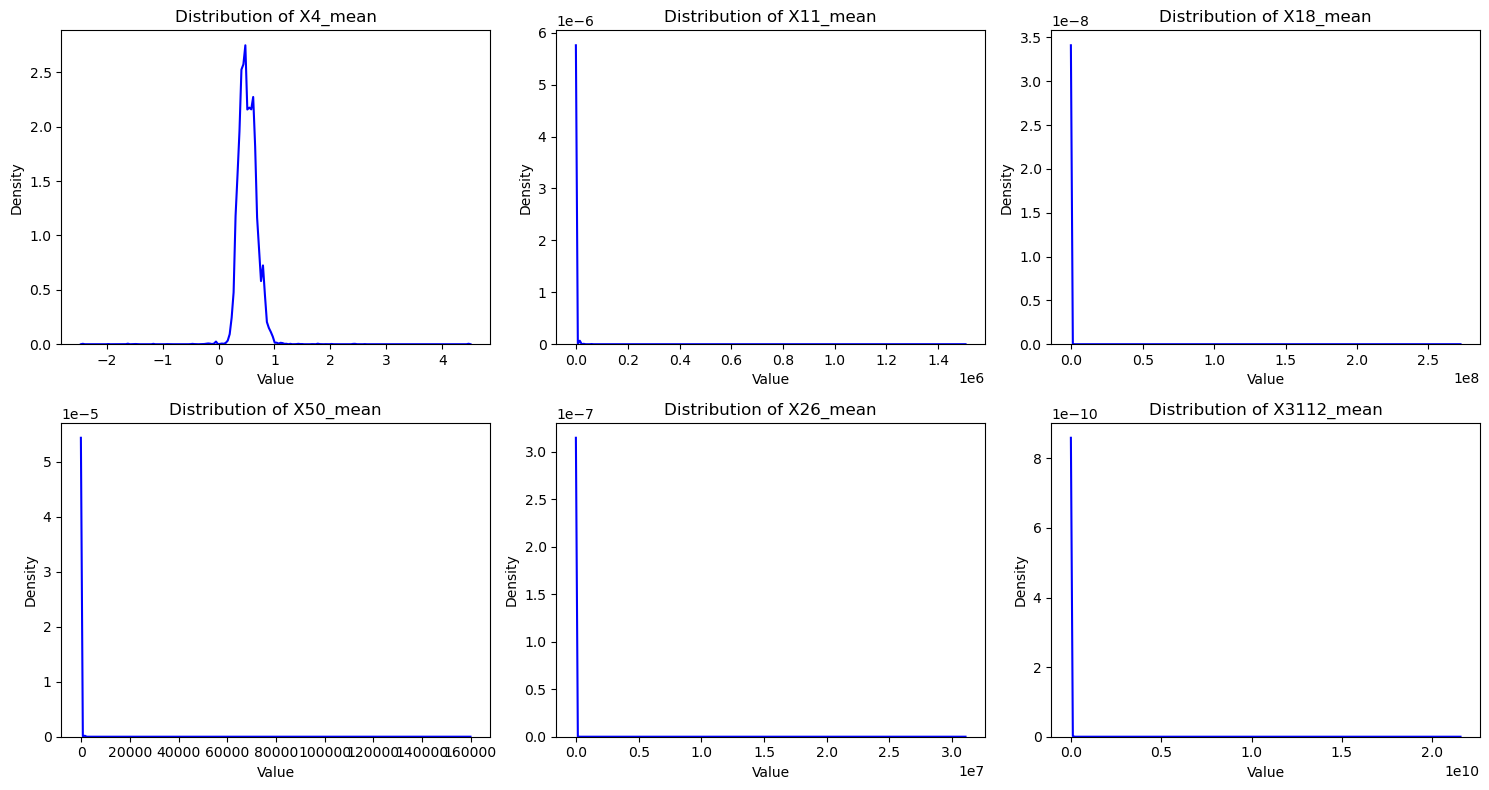

In [19]:
def plot_data(df):
    plt.figure(figsize=(15, 8))

    # Setting up a grid of plots with 2 columns
    n_cols = 3
    n_rows = 2

    for i, col in enumerate(mean_columns):
        plt.subplot(n_rows, n_cols, i+1)
        sns.kdeplot(df[col], bw_adjust=0.5, fill=False, color='blue')
        plt.title(f'Distribution of {col}')
        plt.xlabel('Value')
        plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

plot_data(train)

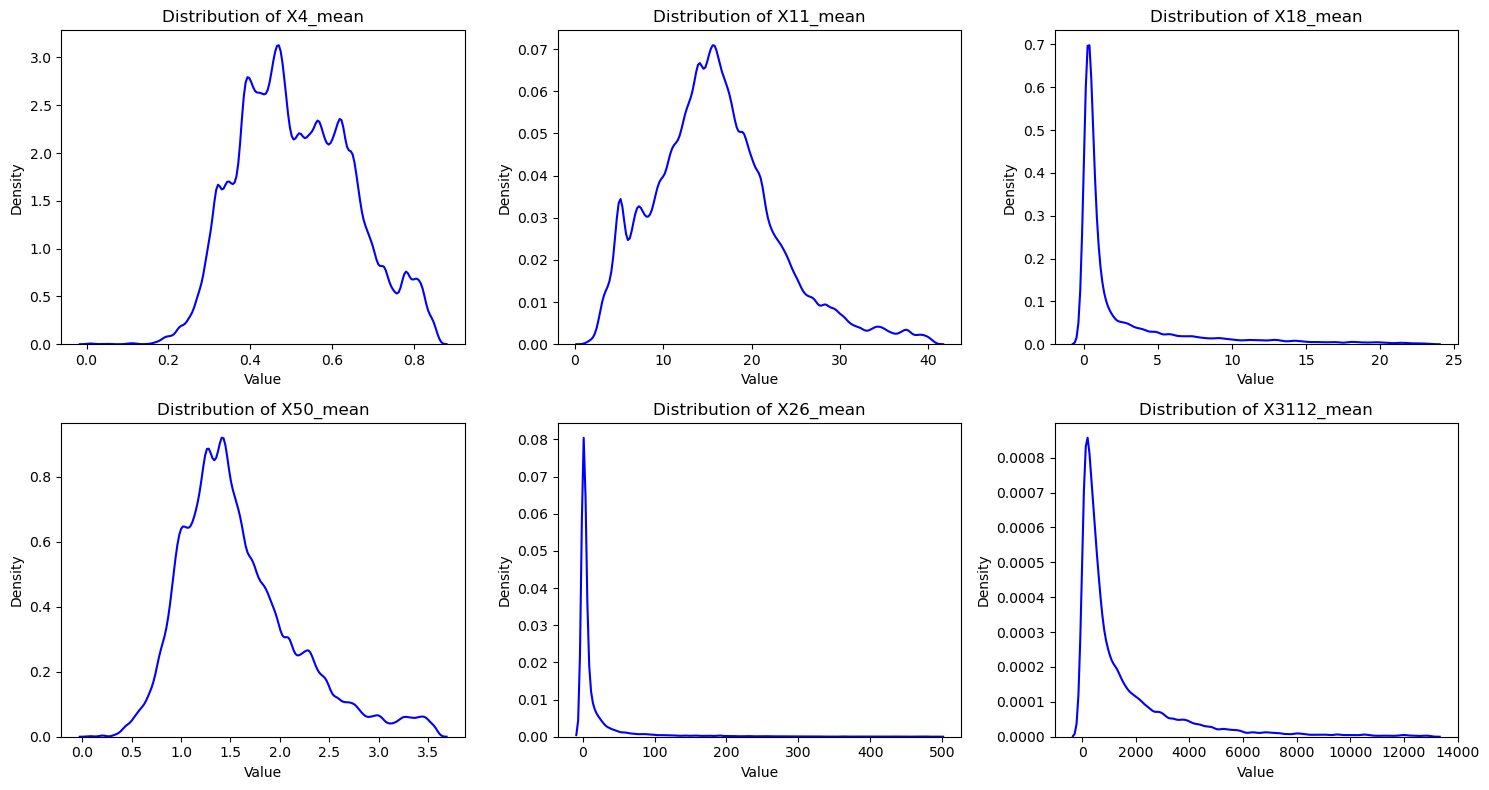

In [20]:
for column in mean_columns:
    upper_quantile = train[column].quantile(0.98)  
    train = train[(train[column] < upper_quantile)]
    train = train[(train[column] > 0)]   
     
plot_data(train)

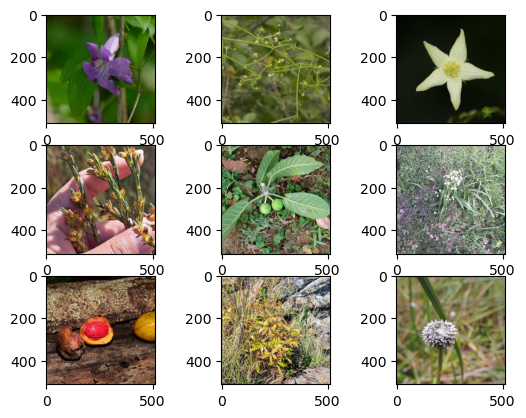

In [22]:
_,axs = plt.subplots(3,3)
data = pd.read_csv('data/train/train.csv')
for i in range(3):
    for j in range(3):
        ax = axs[i,j]

        cnt = (i*3+j)
        img =  cv.imread(data.iloc[cnt,-1])
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        ax.imshow(img)